In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Data collection and analysis
# loading data from csv to pandas
country_data = pd.read_csv(r'C:\Users\NAMRUTHA V\Downloads\Cluster Country-data.csv')

In [3]:
#first 5 rows of datset
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# no.of rows and columns of dataset
country_data.shape

(167, 10)

In [5]:
# getting some info about dataset
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#check for missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
# SCALING : scaling is a method used to normalize the range of independent variables or features of data.
#         example -- if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), 
#         (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range,
#         for example- centered around 0 or in the range (0,1) depending on the scaling technique.

country_scale = country_data[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
country_scale = scaler.fit_transform(country_scale)
country_scale.shape

(167, 9)

In [10]:
country_scale = pd.DataFrame(country_scale)
country_scale.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
country_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
# country_scale is ready for clustering

C:\Users\NAMRUTHA V\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


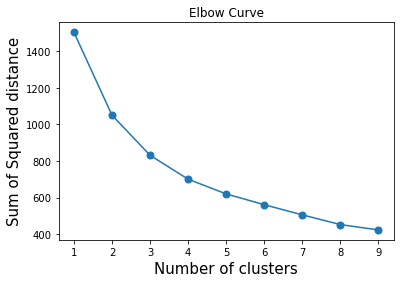

In [12]:
# K-MEANS CLUSTERING
# elbow method

ssd = []
n_cluster = list(range(1,10))
for num_clusters in n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scale)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(n_cluster,ssd,marker='o',markersize=7)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.title("Elbow Curve")
plt.show()

In [13]:
# optimum number of clusters=3

In [16]:
#Running K-means with K = 3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 14)
kmeans.fit(country_scale)

KMeans(max_iter=50, n_clusters=3, random_state=14)

In [17]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [18]:
# Entering the Cluster in the column 'cluster_K' for further analysis

cluster_K = pd.DataFrame(kmeans.labels_, columns = ['cluster_K'])

In [20]:
# Saving the new dataframe for further analysis

country_cluster = country_data.copy()

In [21]:
# Combing the cluster with cluster labels extracted from K-means

country_cluster = pd.concat([country_cluster, cluster_K ], axis =1)

In [22]:
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [23]:
# To check How many datapoints we have in each cluster
country_cluster.cluster_K.value_counts().reset_index()

,index,cluster_K
0,0,84
1,2,47
2,1,36


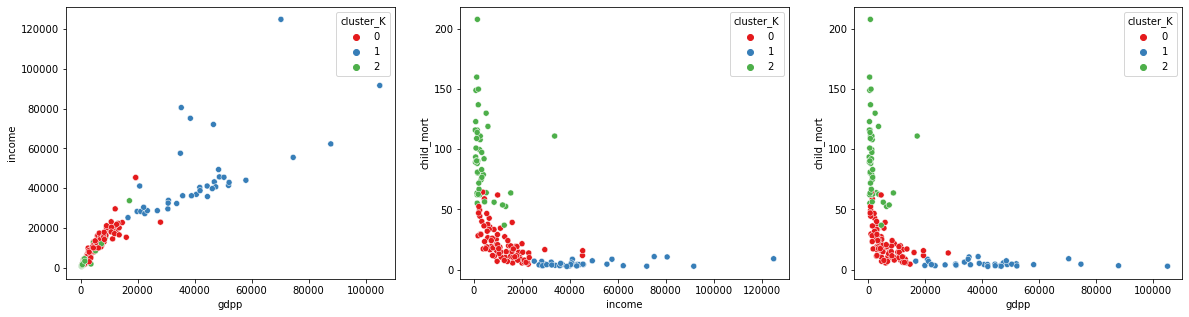

In [27]:
# VISUALIZING THE CLUSTERS
# Scatter-plot:

f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='gdpp', y='income', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[0]);
sns.scatterplot(x='income', y='child_mort', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[1]);

sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[2]);

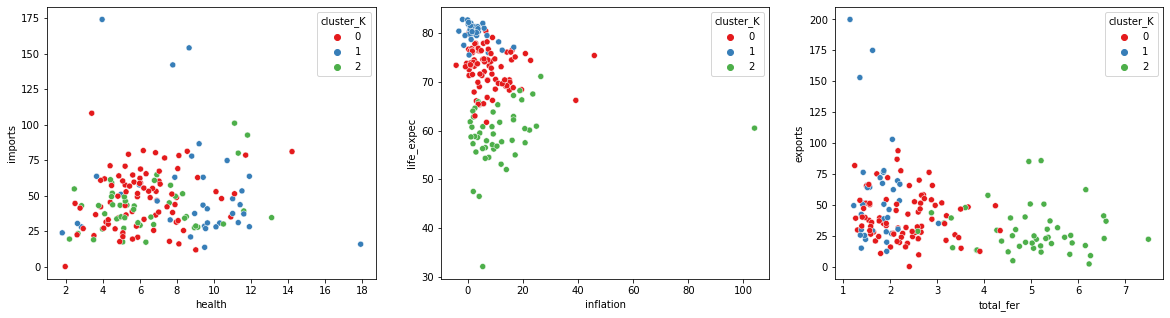

In [30]:
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='health', y='imports', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[0]);
sns.scatterplot(x='inflation', y='life_expec', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[1]);

sns.scatterplot(x='total_fer', y='exports', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[2]);

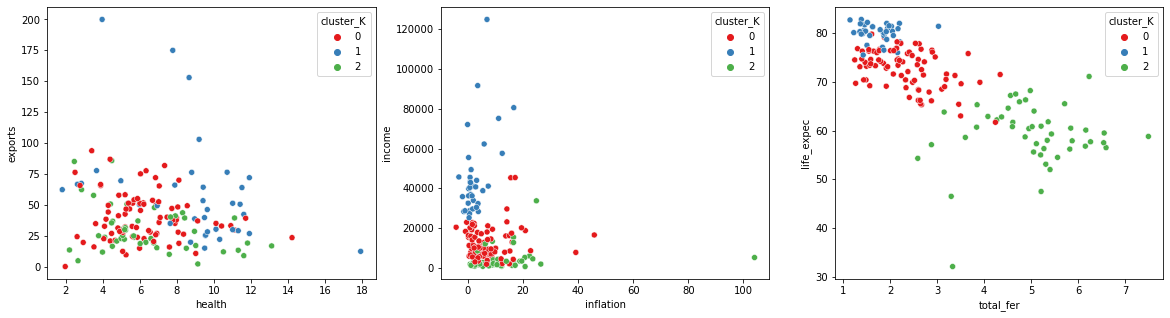

In [31]:
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='health', y='exports', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[0]);
sns.scatterplot(x='inflation', y='income', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[1]);

sns.scatterplot(x='total_fer', y='life_expec', hue='cluster_K', data=country_cluster, palette='Set1',ax=axes[2]);